# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/data/real_estate_data.csv', sep='\t')#Читаем dataset и сохраняем его в переменной df

In [3]:
df.head(15)#выводим первые 15 строк таблицы c данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()#получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

**Мы имеем таблицу, в которой 22 столбца, 23699 строк(записей). Так же 4 типа данных: `bool(2)`, `float64(14)`, `int64(3)`, `object(3)`**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)*
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

**В некоторых столбдцах имеются пропуски значений**

* `ceiling_height`
* `floors_total`
* `living_area`
* `is_apartment`
* `kitchen_area`
* `balcony`
* `locality_name`
* `airports_nearest`
* `cityCenters_nearest`
* `open_plan`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `days_exposition`

**Для дальнейшего продвижения нужно устранить проблемы в данных.**

## Предобработка данных

**2.1 Определяем и изучаем пропущенные значения**

In [5]:
df.isna().sum() #находим пропущенные значения(где и сколько)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Обнаружены пропуски в столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`.**

**Хочется псмотреть долю пропусков в процентах**

In [6]:
round(df.isna().mean()*100,1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

In [7]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')# темным цветом подсветка 0 или ближе к 0, 
#желтым и красным цветами большие значения соответственно.

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


**Принимаю решение обрабатывать столбцы, доля пропусков которых меньше 5%, а именно:**
* `floors_total`, `locality_name`(удалим пропуски через dropna)
**За исключением:**
* `balcony`(по заданию правильно заменить на 0)
* `ceiling_height`(в большинстве своём имеет одинаковое значение, заменим на медиану)
* `is_apartment`(меняем на False)
* `days_exposition`(меняем на 0, так как объяление может еще висеть после продажи, либо сегодня разместили и сегодня сняли.

**parks_around3000 и ponds_around3000 имеют одиниковое кол-во пропусков. Вероятнее всего это вызвано технической ошибкой. Т.к. они взаимосвязаны между собой. Меня на медианные значения смысла не вижу, оставим как есть.**


**Удалим строки с пропусками в столбце `locality_name` и `floors_total`**

In [8]:
df = df.dropna(subset = ['locality_name', 'floors_total'])

**Заменяем пропуски в столбце `balcony` на 0 по заданию и приводим его к типу int**

In [9]:
df['balcony'] = df['balcony'].fillna(0).astype(int) #заменяем пропуски в столбце balcony на ноль

**Заменяем пропуски в столбце `ceiling_height` медианой так, как потолки во всех квартирах одинаковы, уникальность низкая**

In [10]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()


**Заменяем пропуски в столбце `is_apartment` на False**

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Заменяем пропуски в столбце `days_exposition` на 0**

In [12]:
df['days_exposition'] = df['days_exposition'].fillna(0)

**В столбцах living_area и kitchen_area пропущенные значения заменим на медианные в зависимости от количества комнат. Сделаем это циклом через loc. Однако предварительно нужно заменить значение 0 на значение 1 в столбце rooms (т.к. не бывает квартир без комнат).**

In [13]:
df['rooms'] = df['rooms'].replace(0, 1)
for row in df['rooms'].unique():
    df.loc[df['kitchen_area'].isna() & (df['rooms']==row), 'kitchen_area'] = df.loc[df['rooms']==row, 'kitchen_area'].median()
    df.loc[df['living_area'].isna() & (df['rooms']==row), 'living_area'] = df.loc[df['rooms']==row, 'living_area'].median()

In [14]:
round(df.isna().mean()*100,1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height           0.0
floors_total             0.0
living_area              0.0
floor                    0.0
is_apartment             0.0
studio                   0.0
open_plan                0.0
kitchen_area             0.0
balcony                  0.0
locality_name            0.0
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.7
days_exposition          0.0
dtype: float64

**Пропуски в оставшихся столбцах трогать не станем - очень уж большой в них процент пропусков, и совершенно непонятно, чем его замещать. Хотя и можно заполнить их медианными значениями или, к примеру "-1", но я не уверен в верности этого решения.**

**2.1 Замена типов данных**

**Заменим тип данных в столбце is_apartment на bool - это логично, т.к. теперь там значения лишь True и False.**

In [15]:
df['is_apartment'] = df['is_apartment'].astype('bool')

**В столбце `first_day_exposition` заменим тим данных на datetime64 - это нужно для дальнейшней работы.**

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [17]:
df.head(5)# Проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Замена прошла успешно**

## Расчёты и добавление результатов в таблицу

**3.1 Создадим столбец с ценой за квадратный метр, назовём его `price_per_square_meter`.**

In [18]:
df['price_per_square_meter'] = df['last_price']/df['total_area']

**Переводим в тип int для читаемости**

In [19]:
df['price_per_square_meter'] = df['price_per_square_meter'].astype(int)

In [20]:
df.head(5)#проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


**3.2 Создадим столбцы, в которых будут день недели, месяц и год публикации объявления.**

In [21]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [22]:
df.head(5)#проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0.0,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


**Заменим стандартные значения в столбце `weekday` на более удобные. Используем для этой цели словарь и метод .map:**

In [23]:
weekday_dict = {0: 'пнд', 1: 'вт', 2: 'ср', 3: 'чт', 4: 'пт', 5: 'сб', 6: 'вс'}
df['weekday'] = df['weekday'].map(weekday_dict)

**Тоже сделаем со столбцом `month`**

In [24]:
month_dick = {1: 'Январь', 1: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
df['month'] = df['month'].map(month_dick)

In [25]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0.0,120370,чт,Март,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,вт,Декабрь,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,чт,Август,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,пт,Июль,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,вт,Июнь,2018


**3.3 Создадим функцию type_floor для указания этажа, а затем отдельный столбец.**

In [26]:
def type_floor (i):
    floors_total = i['floors_total']
    floor=i['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    if 1 < floor < floors_total:
        return 'другой'
df['type_floor'] = df.apply(type_floor, axis = 1)

In [27]:
df.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,0.0,120370,чт,Март,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,вт,Декабрь,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,чт,Август,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,пт,Июль,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,вт,Июнь,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,пнд,Сентябрь,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195,чт,Ноябрь,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,0.0,NaN,0.0,NaN,0.0,110544,чт,Апрель,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454,ср,Май,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524,вс,NaN,2017,другой


**3.4 Теперь создадим два столбца: соотношение жилой и общей площади и отношение площади кухни к общей.**

In [28]:
df['liv_coef'] = df['living_area']/df['total_area'] #создадим коэффициенты, чтоб уточнить данные,
df['kit_coef'] = df['kitchen_area']/df['total_area']#разделив площади (жилые и кухни) на общую

In [29]:
df.corr().style.background_gradient('coolwarm')# посмотрим что больше всего коррелирует с площадями - это количсетво комнат

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year,liv_coef,kit_coef
total_images,1.000000,0.105026,0.116969,0.098121,0.004470,0.009822,0.106992,0.032781,0.010402,-0.028201,-0.024670,0.108484,0.046879,-0.002701,-0.048103,0.020955,-0.006017,-0.011352,-0.003995,-0.056113,0.133189,0.139238,-0.002142,-0.045042
last_price,0.105026,1.000000,0.653621,0.365046,0.064411,-0.006745,0.556050,0.026842,0.026981,-0.025084,-0.008801,0.454102,0.008568,-0.026216,-0.206353,0.151492,-0.016529,0.160735,-0.085836,0.053312,0.736798,-0.042864,-0.036206,-0.116803
total_area,0.116969,0.653621,1.000000,0.760623,0.080765,-0.075252,0.909878,-0.024368,0.029748,-0.072000,-0.034942,0.585764,0.010243,-0.030466,-0.231181,0.165890,-0.021266,0.163757,-0.100140,0.097027,0.302571,-0.079041,0.076201,-0.365191
rooms,0.098121,0.365046,0.760623,1.000000,0.049416,-0.223215,0.857106,-0.148845,0.000048,-0.079876,-0.045051,0.275454,-0.012246,-0.063463,-0.186200,0.136655,-0.053134,0.094715,-0.060541,0.078130,0.057705,-0.054226,0.470974,-0.598608
ceiling_height,0.004470,0.064411,0.080765,0.049416,1.000000,-0.026747,0.079131,-0.012604,0.146555,0.000381,0.017674,0.068110,0.032777,-0.018764,-0.075420,0.056845,-0.019055,0.063707,-0.047483,0.009371,0.099885,-0.000189,0.006708,0.005420
floors_total,0.009822,-0.006745,-0.075252,-0.223215,-0.026747,1.000000,-0.170622,0.678010,-0.026402,0.070224,0.050844,0.148305,0.173408,0.108547,0.018743,-0.252490,0.097608,-0.122799,0.040003,-0.026246,0.148423,0.007883,-0.350764,0.337350
living_area,0.106992,0.556050,0.909878,0.857106,0.079131,-0.170622,1.000000,-0.098241,0.028047,-0.055965,-0.031674,0.423768,-0.010635,-0.056905,-0.225695,0.181456,-0.053759,0.146334,-0.083642,0.091095,0.212774,-0.072720,0.399228,-0.491380
floor,0.032781,0.026842,-0.024368,-0.148845,-0.012604,0.678010,-0.098241,1.000000,-0.013234,0.035946,0.036184,0.124687,0.171507,0.073129,0.008336,-0.163601,0.072988,-0.076240,0.026467,-0.020818,0.129203,0.005404,-0.255116,0.233577
is_apartment,0.010402,0.026981,0.029748,0.000048,0.146555,-0.026402,0.028047,-0.013234,1.000000,-0.003641,-0.002462,0.040138,0.032944,0.016508,0.003734,0.020823,-0.033553,0.024097,0.003303,0.008686,0.044794,0.009289,0.001022,0.012078
studio,-0.028201,-0.025084,-0.072000,-0.079876,0.000381,0.070224,-0.055965,0.035946,-0.003641,1.000000,-0.004216,-0.020179,0.030019,-0.021707,-0.006864,-0.030857,0.006923,0.000813,0.001838,-0.017050,0.015529,0.010860,0.084412,0.160646


## Исследовательский анализ данных

**4.1 Создадим переменную `X_1` размером 5% по 95% квантиль, для отображения графика по столбцу `last_price`**

In [30]:
X_1 = df.loc[(df['last_price'] >= df['last_price'].quantile(.05))&(
    df['last_price'] <= df['last_price'].quantile(.95)), 'last_price']

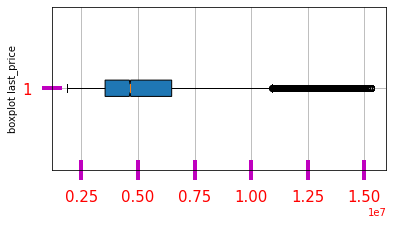

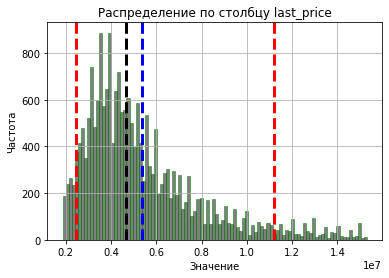

In [31]:
plt.figure(figsize =(6, 3)) # задаем размер фигуры
plt.boxplot(X_1, # строим боксплот
            notch=True, # формируем красивый "разрезик" в центре
            sym="o", # задаем символ выброса
            vert=False, # повернем боксплот
            widths = 0.1, # задаем толщину линий
            patch_artist = True) # заливаем боксплот
plt.ylabel('boxplot last_price') # подпись
plt.tick_params(axis = 'both', # Применяем параметры к обеим осям
            which = 'major', # Применяем параметры к основным делениям
            direction = 'inout', # Рисуем деления внутри и снаружи графика
            length = 20, # Длинна делений
            width = 4, # Ширина делений
            color = 'm', # Цвет делений
            pad = 10, # Расстояние между черточкой и ее подписью
            labelsize = 15, # Размер подписи
            labelcolor = 'r' # Цвет подписи
           ) # Поворот подписей
plt.grid() # отобразим сетку
plt.show() # отобразим сам график
plt.figure(figsize =(6, 4)) # сформируем размер для гистограммы
hist = X_1.plot( # строим график
                kind='hist', # присваиваем гистограмму
                bins=100, # задаем размер корзин
                alpha=0.5, # прозрачность графика
                ec='green', # цвет обводки
                color='black', # цвет графика
                )
plt.axvline(x=X_1.median(), # добавим линию медианы
                linewidth=3, # толщина линии
                color='black', # цвет линии
                linestyle='--') # тип линии
plt.axvline(x=X_1.mean(), # добавим среднее
                linewidth=3,# толщина линии 
                color='blue',# цвет линии
                linestyle='--')# тип линии
plt.axvline(x=X_1.quantile(.05), # добавим линию 5% квантили
                linewidth=3,
                color='r',
                linestyle='--')
plt.axvline(x=X_1.quantile(.95), # добавим линию 95% квантили
                linewidth=3,
                color='r',
                linestyle='--')
plt.title('Распределение по столбцу last_price') # Заголовок
plt.xlabel('Значение') # подпишем ось Х
plt.ylabel('Частота') # подпишем ось У
plt.grid() # сетка
plt.show() # отображаем график

In [32]:
X_1.describe()

count    2.121400e+04
mean     5.379509e+06
std      2.648018e+06
min      1.860000e+06
25%      3.550000e+06
50%      4.650000e+06
75%      6.490000e+06
max      1.530000e+07
Name: last_price, dtype: float64

**Создадим функцию для автоматизации определиня корзин**

In [33]:
def value_bins(df, value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return 100
    elif df[value].max() > 1000:
        return 200
    else:
        return 20

In [34]:
def my_histogr(df, column):
    coef_bins = 0.005
    X_1 = df.loc[(df[column] >= df[column].quantile(.05))&(df[column] <= df[column].quantile(.95)), column]
    plt.figure(figsize =(6, 2))
    plt.boxplot(X_1,
            notch=True,
            sym="o",
            vert=False,
            widths = 0.1,
            patch_artist = True)
    plt.ylabel('boxplot ' + column)
    plt.tick_params(axis = 'both',
               which = 'major',
               direction = 'inout',
               length = 20,
               width = 4,
               color = 'm',
               pad = 10,
               labelsize = 15,
               labelcolor = 'r'
             )
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(
                kind='hist',
                bins=value_bins(df, column),
                alpha=0.5,
                ec='black',
                color='green',
                )
    plt.axvline(x=X_1.median(),
                linewidth=3,
                color='black',
                linestyle='--')
    plt.axvline(x=X_1.mean(), 
                linewidth=3,
                color='blue',
                linestyle='--')
    plt.axvline(x=X_1.quantile(.05),
                linewidth=3,
                color='r',
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),
                linewidth=3,
                color='r',
                linestyle='--')
    plt.title('Распределение по столбцу ' + column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    print('--------------------------------------------------------------')


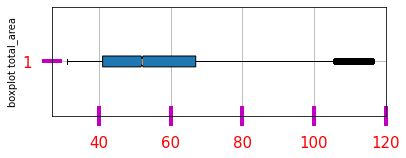

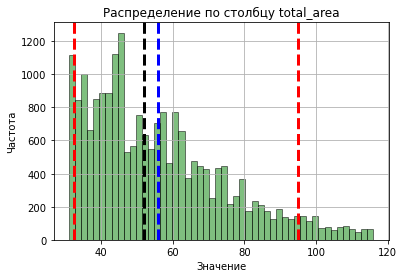

--------------------------------------------------------------


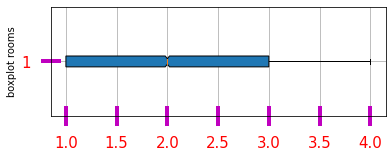

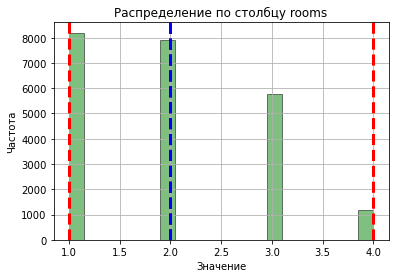

--------------------------------------------------------------


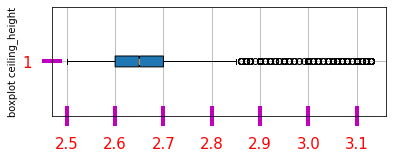

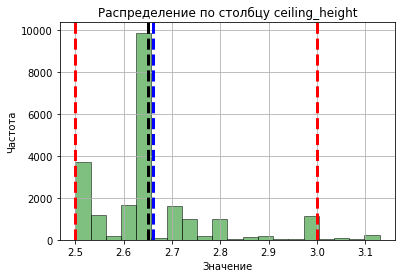

--------------------------------------------------------------


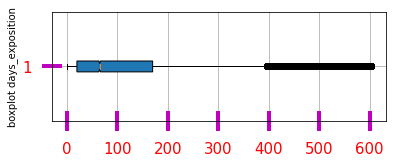

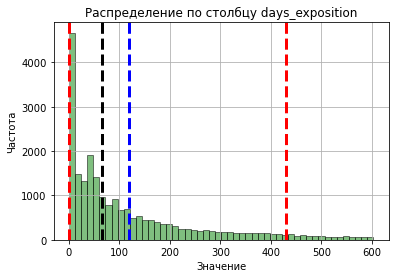

--------------------------------------------------------------


In [35]:
my_list = ['total_area', 'rooms', 'ceiling_height', 'days_exposition']
for i in my_list:
    my_histogr(df, i)

**Выводы по столбцам:**

* `last_price`: Из данных гистограммы мы видим данные распределены таким образом, что основные данные приходятся в промежутке от 0,2 до 0,6(2млн до 6млн), медианное значение на уровне примерно 0,49. Примерно с 5 млн значения уходят на плато. Основные цены в диапозоне от 1.8млн до 6 млн.

* `total_area`: По данным гистограммы наблюдаем, что больше всего квартир приходится в диапозоне от 35мкв до 45мкв, дальше идет снижение. Обуславливаю тем, что дороже цена за мкв.

* `rooms`: Золотая середина приходится на 2-х комнатные квартиры, чуть больше берут однокомнатные и по убыванию 3-х и 4-х комнатные. Считаю, что однокомнатные популярней по ряду причин: цена(доступней для одиноких людей, а также людям в гражданском браке), рентабельность(покупка с целью продать дороже, а так же сдача в наём для приезжих, студентов и т.д), наследство.

* `ceiling_height`: Здесь наблюлдаем пик на 2,6м высоты. Здесь считаю, что все просто, так как в большинстве у всех квартир одинаковая высота потолков, полюс дополню личным многолетним опытом продажи строительных материалов - чем выше высота потолка, тем дороже и трудозатретней ремонт.

**4.2 По графику `days_exposition`, можно сказать, что обычно продажа занимает от 70 (средний показатель) до 120 (медианный) дней. Необычно долго продажи идут примерно после 430-440 дней после публикации, а если квартира продаётся через приблизительно 20 дней после публикации, то можно сказать, что она продалась довольно быстро.**

**4.3 Теперь уберём все редкие и выбивающиеся значения по всем столбцам, которые мы планируем анализировать: `last_price`, `total_area`, `room`, `ceiling_height`**

In [36]:
p95_price = df['last_price'].quantile(0.95)
p95_area = df['total_area'].quantile(0.95)
p95_rooms = df['rooms'].quantile(0.95)
p95_ceiling_height = df['ceiling_height'].quantile(0.95)

clean_df = df.query('last_price < @p95_price and total_area < @p95_area and rooms < @p95_rooms and ceiling_height < @p95_ceiling_height' )

In [37]:
# КОД РЕВЬЮЕРА

clean_df[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,12190.0,12.0,1.0,1.00
max,15200000.0,115.4,3.0,3.12


**4.4 Какие факторы больше всего влияют на стоимость квартиры**

In [38]:
clean_df.corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year,liv_coef,kit_coef
total_images,1.000000,0.168498,0.119727,0.091907,0.013644,0.021546,0.102678,0.039463,0.015773,-0.027571,-0.022441,0.068391,0.046112,-0.004696,-0.034220,0.005480,-0.003862,-0.023609,-0.000981,-0.062770,0.128311,0.147030,0.001039,-0.050368
last_price,0.168498,1.000000,0.713407,0.418157,0.339234,0.238934,0.542588,0.164865,0.021897,-0.066276,-0.044449,0.504289,0.095371,-0.020418,-0.318261,0.105682,0.074765,0.136820,-0.055766,0.038510,0.681235,0.006754,-0.073258,-0.131824
total_area,0.119727,0.713407,1.000000,0.787648,0.232535,0.038618,0.883963,0.015258,0.016845,-0.120331,-0.073450,0.449564,0.088324,-0.001927,-0.109717,0.041801,0.034951,0.082486,-0.030226,0.068107,0.020806,-0.049649,0.145349,-0.443192
rooms,0.091907,0.418157,0.787648,1.000000,0.014797,-0.186300,0.901876,-0.141273,-0.005988,-0.090200,-0.054550,0.055343,0.034848,-0.025241,-0.046707,0.042281,-0.025723,0.011589,0.001169,0.038782,-0.176585,-0.021180,0.550020,-0.656538
ceiling_height,0.013644,0.339234,0.232535,0.014797,1.000000,0.119784,0.122474,0.077124,0.061811,0.027558,0.006835,0.305605,0.032794,-0.047651,-0.185183,0.095428,-0.016886,0.121687,-0.062455,0.043968,0.252422,-0.055065,-0.152473,0.123285
floors_total,0.021546,0.238934,0.038618,-0.186300,0.119784,1.000000,-0.132147,0.671325,-0.015158,0.072246,0.050962,0.330306,0.160451,0.083222,-0.064790,-0.224475,0.094010,-0.086334,0.012685,-0.012720,0.341678,-0.002149,-0.361253,0.348137
living_area,0.102678,0.542588,0.883963,0.901876,0.122474,-0.132147,1.000000,-0.102615,0.007296,-0.077985,-0.045287,0.148208,0.050603,-0.030713,-0.081834,0.066080,-0.022483,0.045946,-0.006972,0.047418,-0.102402,-0.035247,0.567929,-0.625499
floor,0.039463,0.164865,0.015258,-0.141273,0.077124,0.671325,-0.102615,1.000000,-0.007231,0.036909,0.035952,0.223032,0.158761,0.056080,-0.037351,-0.149377,0.070965,-0.056596,0.018011,-0.014308,0.246511,0.001424,-0.256876,0.243445
is_apartment,0.015773,0.021897,0.016845,-0.005988,0.061811,-0.015158,0.007296,-0.007231,1.000000,-0.003133,-0.002090,0.018106,0.039820,0.017543,0.020364,-0.006420,-0.019627,-0.000123,0.014784,-0.006074,0.015145,0.016071,-0.007398,0.007069
studio,-0.027571,-0.066276,-0.120331,-0.090200,0.027558,0.072246,-0.077985,0.036909,-0.003133,1.000000,-0.004621,-0.013384,0.033165,-0.023346,-0.012548,-0.032113,0.012953,0.005205,-0.004171,-0.016598,0.040112,0.009005,0.095998,0.172375


**По таблице можно уже сделать выводы о зависимостях и корреляции, но цифры нужно подкрепить наглядными графиками** 

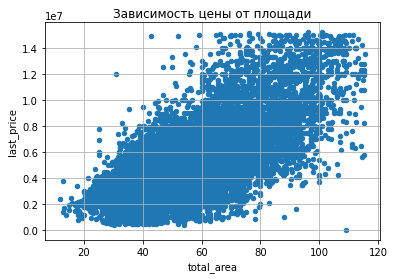

In [39]:
clean_df.plot(x='total_area', y='last_price', kind='scatter', title='Зависимость цены от площади', grid=True)
plt.show()

Цена зависит от площади (что логично) - корреляция составляет 0.71 - довольно высоко!

**Теперь посмотрим на зависимость цены от количества комнат.**

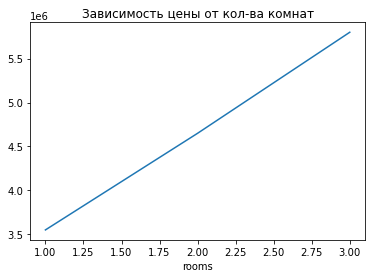

In [40]:
rooms = clean_df.groupby('rooms')['last_price'].median()
rooms.plot(title='Зависимость цены от кол-ва комнат')
plt.show()

График, построенный по количеству комнат, в общем и  целом показывает, что чем больше комнат, тем дороже квартира. Следует также учесть значение из таблицы корреляции - 0,41. Т.е. зивисимость между ценой и количеством комнат есть, но последнее - не самый главный фактор. Однушка в столице может стоить дороже трёшки в пгт.

**Изучим теперь зависимость цены от удалённости от центра.**

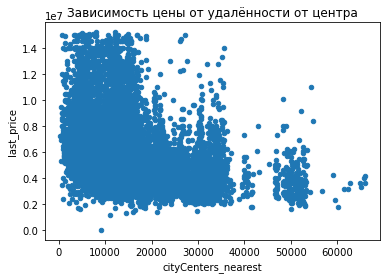

In [41]:
clean_df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', title='Зависимость цены от удалённости от центра')
plt.show()

Наблюдается сильный разброс - это означает, что чем ближе квартира находится к центру, тем больше ценовых преложений. Чем дальше от центра, тем меньше дорогих предложений. Отрицательная корреляция в таблице выше(-0,31) подтверждает, что чем дальше от центра, тем дешевле квартиры.

**Изучим теперь зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого сгруппируем датафрейм по столбцам type_floor и last_price (+ медиана) и построим boxplot.**

(1.0, 17000000.0)

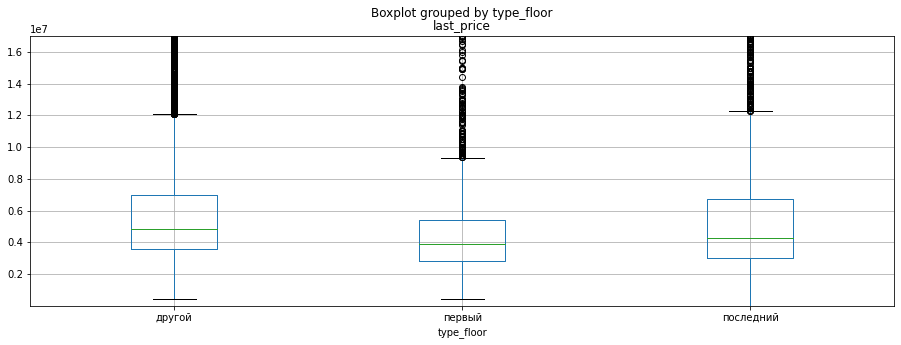

In [42]:
df.boxplot(column = 'last_price', by = 'type_floor', figsize=(15,5))
plt.ylim(1, 17000000)

График, показывает, что медианная цена для квартир на первых и последних этажах ниже, чем на средних.

**Теперь изучим зависимость от даты размещения: дня недели, месяца и года.**

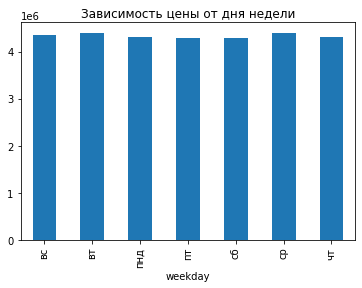

In [43]:
wd = clean_df.groupby('weekday')['last_price'].median()
wd.plot.bar(title='Зависимость цены от дня недели')
plt.show()

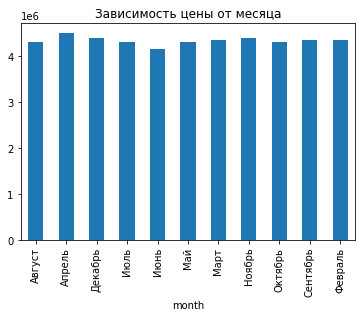

In [44]:
mnth = clean_df.groupby('month')['last_price'].median()
mnth.plot.bar(title='Зависимость цены от месяца')
plt.show()

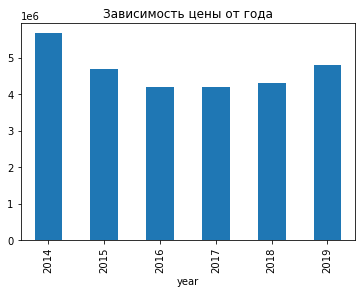

In [45]:
year = clean_df.groupby('year')['last_price'].median()
year.plot.bar(title='Зависимость цены от года')
plt.show()

**Из полученных графиков можно сделать следующий вывод: зависимости цен от дня или месяца различаются незначительно. Но если смотреть таблицу по годам, то мы увидим, что в 2014 году наблюдались наиболее высокие цены на жильё. Возможно, это как-то связано с внешнеполитическими событиями (санкциями против России после конфликта с Украиной). Также хорошо было бы обратить внимание на ключевую ставку Центробанка, от которой зависят ипотечные ставки, в свою очередь влияющие на рыночные цены на недвижимость.**

**4.5 Сделаем сводную таблицу для топ-10 населённых пунктов с наибольшим количеством объявлений, а затем посчитаем в них среднюю цену за м2.**

In [46]:
top100 = clean_df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
top100.columns = ['Кол-во предложений', 'Средняя цена за м2']
top100.sort_values(by='Кол-во предложений', ascending=False).head(10)

,Кол-во предложений,Средняя цена за м2
locality_name,,
Санкт-Петербург,12961,107861.576267
посёлок Мурино,515,85782.264078
посёлок Шушары,428,78601.845794
Всеволожск,381,67322.160105
Пушкин,328,101401.094512
посёлок Парголово,324,90494.157407
Колпино,307,76114.371336
деревня Кудрово,298,92409.265101
Гатчина,296,68637.233108


**По данным таблицы делаем вывод, что самые дорогие квартиры в Санкт-Петербурге, а самые низкие цены на жилье -  в Выборге**

**4.6 Сделаем срез данных по значению "Санкт-Петербург", сохраним в переменной spb. Затем создадим столбец `cityCenters_nearest_km`, в котором будет указано расстояние квартир до центра в километрах.**

In [47]:
spb = clean_df.query('locality_name == "Санкт-Петербург"')
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest']/1000).round(0)

In [48]:
km_mean = spb.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc = ['mean', 'count'])
km_mean.columns=['средняя цена за м2', 'кол-во']
km_mean.head()

,средняя цена за м2,кол-во
cityCenters_nearest_km,,
0.0,110780.000000,4
1.0,129275.089552,67
2.0,124956.158879,107
3.0,113036.317881,151
4.0,125428.081081,333


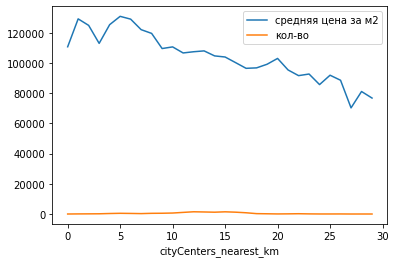

In [49]:
km_mean.plot();

**Судя по графику, снижение цены начинается с 5 км..Значит, в диапозоне до 5 и будем работать. Изучим центр, построив гистраграммы с ипользованием ранненаписанной функции my_histogr. Изучим следующие параметры: площадь, цена, число комнат, высота потолков.**

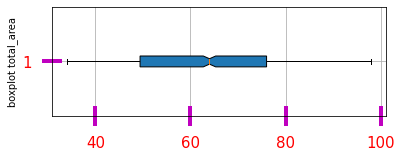

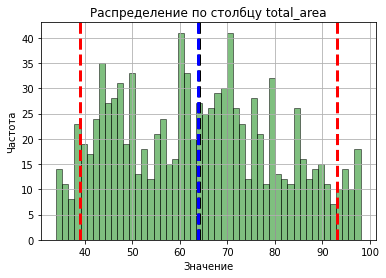

--------------------------------------------------------------


In [50]:
center_flats = spb.query('cityCenters_nearest_km <= 5')
my_histogr(center_flats, 'total_area')

**Судя по графику больше всего квартир (чуть больше 40) имеют площадь примерно 62 м2. Чуть меньше квартир площадью примерно 40 м2. Пока всё вполне логично - большинство квартир однушки и двушки с приблизительно таким метражом.**

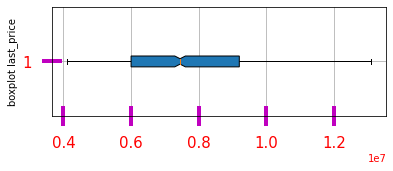

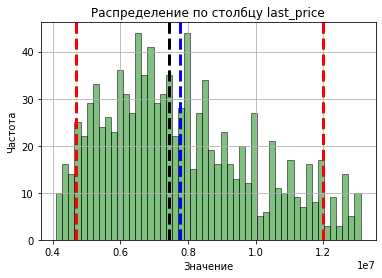

--------------------------------------------------------------


In [51]:
my_histogr(center_flats, 'last_price')

**График говорит, что чаще встречаются недорогие квартиры, а реже - дорогие. Вполне логично - большинство квартир входит в более-менее доступный ценовой диапозон.**

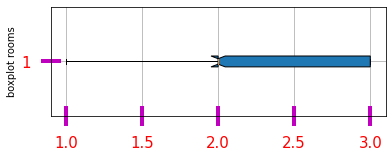

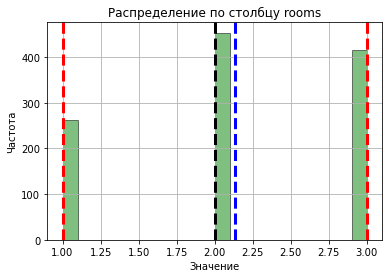

--------------------------------------------------------------


In [52]:
my_histogr(center_flats, 'rooms')

**Чаще встречаются двукомнатные, реже трёхкомнатные, ещё реже однокомнатные, и только затем все прочие.**

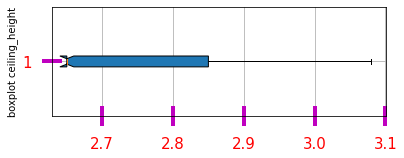

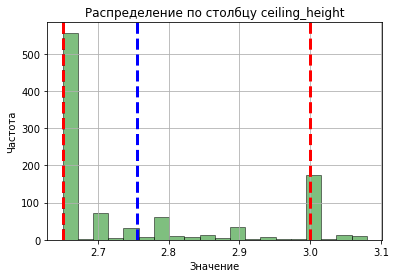

--------------------------------------------------------------


In [53]:
my_histogr(center_flats, 'ceiling_height')

**Средняя высота потолков совпадает с медианой, что неудивительно, ведь мы в самом начале заменили все пропуски на медианное значение.В большинстве квартир приблизительно одинаковая высота потолков.**

**Посмотрим теперь на зависимость цены от числа комнат, этажа, удалённости от центра и даты размещения объявления. Начнём с числа комнат.**

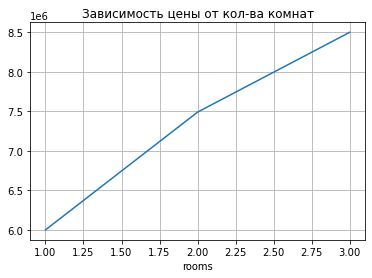

In [54]:
rooms_cf = center_flats.groupby('rooms')['last_price'].median()
rooms_cf.plot(title='Зависимость цены от кол-ва комнат', grid=True)
plt.show()

**Цена повышается от количества комнат**

**Проверим зависимость цены от этажности. Применим уже использовавшуюся ранее функцию для определения типа этажности квартиры, только не ко всему датафрейму, а к квартирам в центре Санкт-Петербурга. Затем повторим ранее осуществлённую операцию с построением графика pie.**

In [55]:
def type_floor(floor):
    if floor == center_flats['floor'].min():
        return 'первый'
    elif floor == center_flats['floor'].max():
        return 'последний'
    else:
        return 'другой'
center_flats['type_floor'] = center_flats['floor'].apply(type_floor)

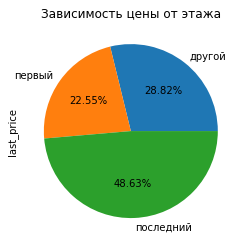

In [56]:
tf1 = center_flats.groupby('type_floor')['last_price'].median()
tf1.plot.pie(title='Зависимость цены от этажа', autopct='%1.2f%%')
plt.show()

**На графике видно, что квартиры на первом этаже дешевле (что согласуется с реальным положением дел), а на последнем самые дорогие.**

**Изучим зависимость цены от удалённости от центра.**

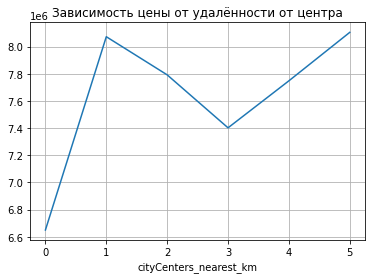

In [57]:
ppk1 = center_flats.groupby('cityCenters_nearest_km')['last_price'].mean()
ppk1.plot(title ='Зависимость цены от удалённости от центра', grid=True)
plt.xticks(center_flats['cityCenters_nearest_km'].unique())
plt.show()

**График показывает то, что мы видели и до этого: чем дальше от центра, тем ниже цена. В районе от 1 и 5 км наблюдается рост цены - возможно, это новостройки.**

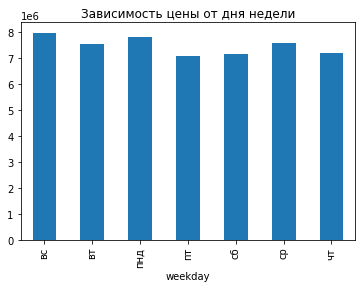

In [58]:
weekday_spb_center = center_flats.groupby('weekday')['last_price'].median()
weekday_spb_center.plot.bar(title='Зависимость цены от дня недели')
plt.show()

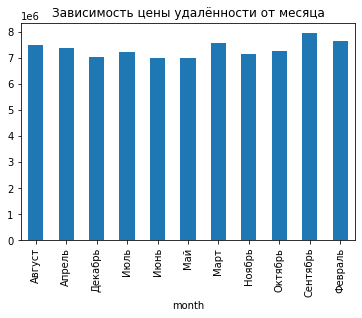

In [59]:
month_spb_center = center_flats.groupby('month')['last_price'].median()
month_spb_center.plot.bar(title='Зависимость цены удалённости от месяца')
plt.show()

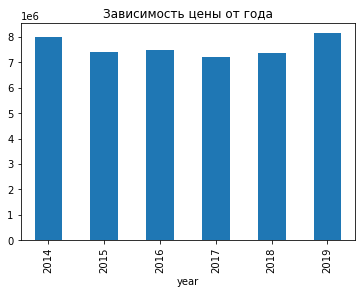

In [60]:
year_spb_center = center_flats.groupby('year')['last_price'].median()
year_spb_center.plot.bar(title='Зависимость цены от года')
plt.show()

**В плане дня и месяца ничего особенно важного не обнаруживается, зато если смотреть по годам, то в 2014 году и в 2019 квартиры стоили дороже, чем в остальные. Аналогичная картина по всем квартирам, представленным в датафрейме.**

## Общий вывод

* Предварительно изучив полученные данные, мы выявили довольно много пустых значений. Решение о том, какие данные нужно заменять, а какие оставить, какие значения необходимо подставить, мы принимали в каждом случае индивидуально. 

* Когда все пропуски были заполнены, мы создали несколько дополнительных столбцов, которые помогли нам в дальнейшем ответить на поставленные вопросы.

* Мы строили графики, диаграммы, таблицы корреляции, чтобы увидеть зависимость цены от нескольких параметров, и делали это как для всех квартир, представленных в датафрейме, так и для квартир в центре Санкт-Петербурга.

* Бросилось в глаза, что в 2014 году цены на жильё были выше, чем в последующие. Возможно, это связано с украинскими событиями и последующими за ними санкциями в отношении России. Хорошо бы ещё посмотреть динамиук ключевуой ставки в Центробанке, которая влияет на цену недвижимости.

* Мы выяснили, что нормально, когда квартира продаётся через 70-120 дней после публикации. Остальные случаи можно считать либо слишком долгой, либо слишком быстрой продажей.

* Цена имеет чёткую зависимость от удалённости от центра - чем дальше она от него, тем дешевле её стоимость. Цена также зависит от площади и количества комнат - здравый смысл согласен с этим - однако зависимость здесь слабая. Очевидно, на цену также влияют прочие факторы, в т.ч. те, которых нет в исходным датафрейме (например, ремонт, а так же наличие школ, детских садов, больниц в шаговой доступности).

Таковы, на мой взгляд, основные выводы.